In [1]:
import os
if os.getcwd().endswith("Examples"):
    os.chdir('../')

from cdrift.approaches import maaradji
from cdrift import evaluation

from pm4py.objects.log.importer.xes import importer as xes_importer
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from pathlib import Path

# Timing
from timeit import default_timer
from datetime import datetime as dt

## Choose an Event Log ##

In [2]:
root = tk.Tk()
root.withdraw()
root.lift()

file_path = filedialog.askopenfilename(filetypes=[("XES Event Log","*.xes")])
print(f"Chosen Log: {Path(file_path).stem}")
log = xes_importer.apply(file_path)

Chosen Log: Atomic_Size2_ConditionalToSequence


parsing log, completed traces ::   0%|          | 0/2999 [00:00<?, ?it/s]

### Parameters / Constants ###

In [3]:
WINDOW_SIZE = 300
MEASURE_WINDOW = None
P_VALUE = 0.05
TRUE_CHANGEPOINTS = [999,1999]

#### Extract Time Series and Apply Sliding Window ####

In [4]:
time_start = default_timer()
cp,pvals = maaradji.detectChangepoints(log, WINDOW_SIZE, P_VALUE, return_pvalues=True)
calc_duration = default_timer() - time_start
print(f"Change Points Detected: {cp}.")

Calculating runs  ::   0%|          | 0/2999 [00:00<?, ?it/s]

Change Points Detected: [970, 2004].


### Plotting ###

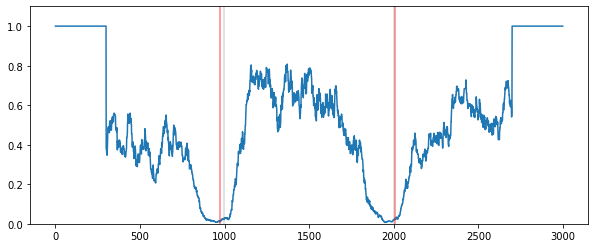

In [5]:
def plotPvals(sig, cp, known_cp):
    fig = plt.figure(figsize=(10,4))
    plt.plot(sig)
    for c in cp:
        plt.axvline(x=c, color="red", alpha=0.5)
    for c in known_cp:
        plt.axvline(x=c, color="grey", alpha=0.3)
    plt.ylim(0,1.1)
    plt.show()

plotPvals(pvals,cp,TRUE_CHANGEPOINTS)

### Evaluation ###

In [6]:
f1 = evaluation.F1_Score(detected=cp, known=[999,1999], lag=200)

print(f"ProDrift detected {cp} with an F1-Score of {f1}. This took {dt.strftime(dt.utcfromtimestamp(calc_duration), '%H:%M:%S')}.")
print(f"Average Lag: {evaluation.get_avg_lag(detected_changepoints=cp, actual_changepoints=TRUE_CHANGEPOINTS, lag=200)}")

ProDrift detected [970, 2004] with an F1-Score of 1.0. This took 00:05:15.
Average Lag: 17.0
